In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_graf(data, title):
    sorted_dict = {}
    for month in range(5,9): sorted_dict.update({month: data.get(month, 0)})
    Series = pd.Series(sorted_dict)
    
    plt.subplots(1,2, figsize = (8, 4))
    plt.subplot(1,2, 1)
    plt.plot(Series.index, Series.values)
    plt.xlabel('Месяц', fontsize=12);
    plt.ylabel('Количество', fontsize=12);
    plt.subplot(1,2, 2)
    plt.title(title, fontsize=16);
    plt.bar(Series.index, Series.values)
    plt.xlabel('Месяц', fontsize=12);
    return pd.DataFrame(sorted_dict.values(), index=sorted_dict.keys(), columns=[title])

In [3]:
df = pd.read_csv('Orders.csv')
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['purchase_month'] = df['purchase_date'].apply(lambda x: x.month)
for i in range(5,9): df[i] = df['purchase_month'].apply(lambda x: int(x == i))
df.head()

,client_id,purchase_date,purchase_month,5,6,7,8
0,165,2015-06-18,6,0,1,0,0
1,205,2015-06-23,6,0,1,0,0
2,235,2015-06-15,6,0,1,0,0
3,250,2015-05-25,5,1,0,0,0
4,250,2015-06-24,6,0,1,0,0


In [4]:
df_count = df.groupby('client_id').agg({'purchase_month':'count'}).rename({'purchase_month':'purchase_count'}, axis=1).merge(
                                                            df.drop('purchase_month',axis=1).groupby('client_id').agg('sum'), 
                                                            left_on='client_id', right_on='client_id')
df_count.head()

,purchase_count,5,6,7,8
client_id,,,,,
165,1,0,1,0,0
205,1,0,1,0,0
235,1,0,1,0,0
250,3,1,1,1,0
251,3,1,1,1,0


## 1. Новые торговые точки 

In [5]:
new_trade_points = df.groupby('client_id').agg({'purchase_month':min})['purchase_month'].value_counts()
new_trade_points

5    100
6     15
Name: purchase_month, dtype: int64

,Количество новых торговых точек
5,100
6,15
7,0
8,0


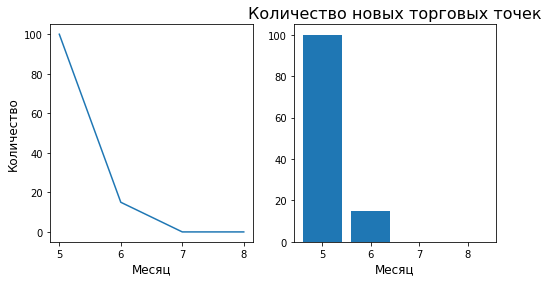

In [6]:
plot_graf(new_trade_points, 'Количество новых торговых точек')

## 2. Торговые точки, сделавшие заказ в прошлом месяце и в этом

In [7]:
client_this_last_month = {}
for month in range(8,5,-1):
    value = 0
    for client_id in df_count.index:
        if df_count.loc[client_id, month] > 0 and df_count.loc[client_id, month-1] > 0:
            value += 1
        client_this_last_month.update({month:value})

,"Торговые точки, сделавшие заказ в прошлом месяце и в этом"
5,0
6,79
7,68
8,0


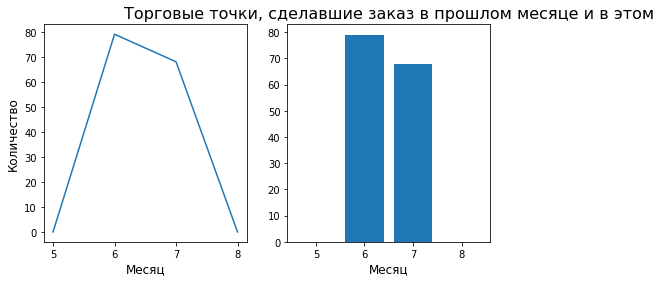

In [8]:
plot_graf(client_this_last_month, 'Торговые точки, сделавшие заказ в прошлом месяце и в этом')

## 3. Торговые точки, которые когда-то что-то заказали(только не в прошлом месяце) и вернувшиеся.

In [9]:
return_dict = {}
for month in range(8,5,-1):
    value = 0
    for id in df_count.index: 
        if df_count.loc[id, month] > 0 and df_count.loc[id, month-1] == 0 and df_count.loc[id, 'purchase_count'] > df_count.loc[id, month]:
            value += 1
        return_dict.update({month:value})

,Вернувшиеся торговые точки
5,0
6,0
7,5
8,1


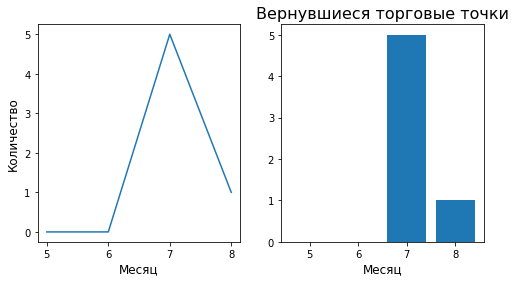

In [10]:
plot_graf(return_dict, 'Вернувшиеся торговые точки')

## 4.Торговые точки, отвалившиеся в этом месяце. 

In [11]:
otval_dict = {}
for month in range(8,5,-1):
    value = 0
    for client_id in df_count.index:
        if df_count.loc[client_id, month] == 0 and df_count.loc[client_id, month-1] > 0:
            value += 1
        otval_dict.update({month:value})

,"Торговые точки, отвалившиеся в этом месяце (по состоянию на 1.08)"
5,0
6,21
7,26
8,73


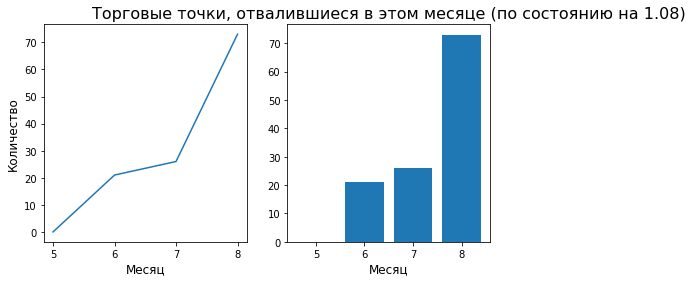

In [12]:
plot_graf(otval_dict, 'Торговые точки, отвалившиеся в этом месяце (по состоянию на 1.08)')